<a href="https://colab.research.google.com/github/sumanmadan/AssignmentsA2RandomizedOptimization/blob/main/GT_A2_UsedForRandomizedOptimzaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EasyVisa Project


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
pip install scikit-learn

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#  Google Colab
from google.colab import drive
drive.mount('/content/drive')
# Read the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv') ## Fill the blank to read the data
visa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv') ## Fill the blank to read the data


Mounted at /content/drive


In [ ]:


# checking the number of unique values
#data["case_id"].'_______' ## Complete the code to check unique values in the mentioned column
unique_case_ids = data['case_id'].nunique()
print("Number of unique values in the 'case_id' column:", unique_case_ids)

Number of unique values in the 'case_id' column: 25480


In [ ]:
# copying data to another variable to avoid any changes to original data
#data = visa.copy()
# Returns the first 5 rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [ ]:
import pandas as pd

# Assuming 'data' is the variable containing your dataset
# Replace '_______' with the actual variable name holding your dataset

# Assuming 'data' is a pandas DataFrame
top_and_bottom_5_rows = pd.concat([data.head(), data.tail()])

print(top_and_bottom_5_rows)


         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y        

In [ ]:
import pandas as pd

# Assuming 'data' is the variable containing your dataset
# Replace '_______' with the actual variable name holding your dataset

# Assuming 'data' is a pandas DataFrame
top_and_bottom_5_rows = pd.concat([data.head(), data.tail()])

print(top_and_bottom_5_rows)

# checking the number of unique values
#data["case_id"].'_______' ## Complete the code to check unique values in the mentioned column
unique_case_ids = data['case_id'].nunique()
print("Number of unique values in the 'case_id' column:", unique_case_ids)


         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                         N             2412         2002   
2                         Y        

### Understand the shape of the dataset

In [ ]:
data.shape ##  Complete the code to view dimensions of the data
data_dimensions = data.shape
print("Number of rows:", data_dimensions[0])
print("Number of columns:", data_dimensions[1])

Number of rows: 25480
Number of columns: 12


### Check the data types of the columns for the dataset

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# checking for duplicate values
#data.('_______') ##  Complete the code to check duplicate entries in the data
# Assuming 'data' is the variable containing your dataset
# Replace '_______' with the actual variable name holding your dataset

# Check for duplicate entries
duplicate_entries = data.duplicated()

# Count the number of duplicate entries
num_duplicates = duplicate_entries.sum()
print("Number of duplicate entries:", num_duplicates)

# Display the duplicate entries if needed
duplicate_data = data[duplicate_entries]
print(duplicate_data)


Number of duplicate entries: 0
Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
data.describe() ##  Complete the code to print the statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [ ]:
#data.loc['_______'].shape ## Complete the code to check negative values in the employee column
# Assuming 'data' is the variable containing your dataset
# Replace '_______' with the actual variable name holding your dataset
# Replace 'employee_column' with the actual column name containing the employee values

# Check for negative values in the employee column
negative_values_count = data.loc[data['no_of_employees'] < 0].shape[0]
print("Number of negative values in the employee column:", negative_values_count)



Number of negative values in the employee column: 33


In [ ]:
# checking for duplicate values
#data.('_______') ##  Complete the code to check duplicate entries in the data
# Assuming 'data' is the variable containing your dataset
# Replace '_______' with the actual variable name holding your dataset

# Check for duplicate entries
duplicate_entries = data.duplicated()

# Count the number of duplicate entries
num_duplicates = duplicate_entries.sum()
print("Number of duplicate entries:", num_duplicates)

# Display the duplicate entries if needed
duplicate_data = data[duplicate_entries]
print(duplicate_data)


Number of duplicate entries: 0
Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


In [ ]:
# checking for duplicate values
#data.('_______') ##  Complete the code to check duplicate entries in the data
# Assuming 'data' is the variable containing your dataset
# Replace '_______' with the actual variable name holding your dataset

# Check for duplicate entries
duplicate_entries = data.duplicated()

# Count the number of duplicate entries
num_duplicates = duplicate_entries.sum()
print("Number of duplicate entries:", num_duplicates)

# Display the duplicate entries if needed
duplicate_data = data[duplicate_entries]
print(duplicate_data)


Number of duplicate entries: 0
Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


In [ ]:
# taking the absolute values for number of employees
#data["no_of_employees"] = '_______'(data["no_of_employees"]) ## Write the function to convert the values to a positive number
data["no_of_employees"] = abs(data["no_of_employees"])


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)
print(data.columns)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [ ]:
# checking the number of unique values
#data["case_id"].'_______' ## Complete the code to check unique values in the mentioned column
unique_case_ids = data["case_id"].nunique()
print("Number of unique values in the 'case_id' column:", unique_case_ids)


Number of unique values in the 'case_id' column: 25480


In [ ]:
#data.drop(["________"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data
data.drop(["case_id"], axis=1, inplace=True)


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

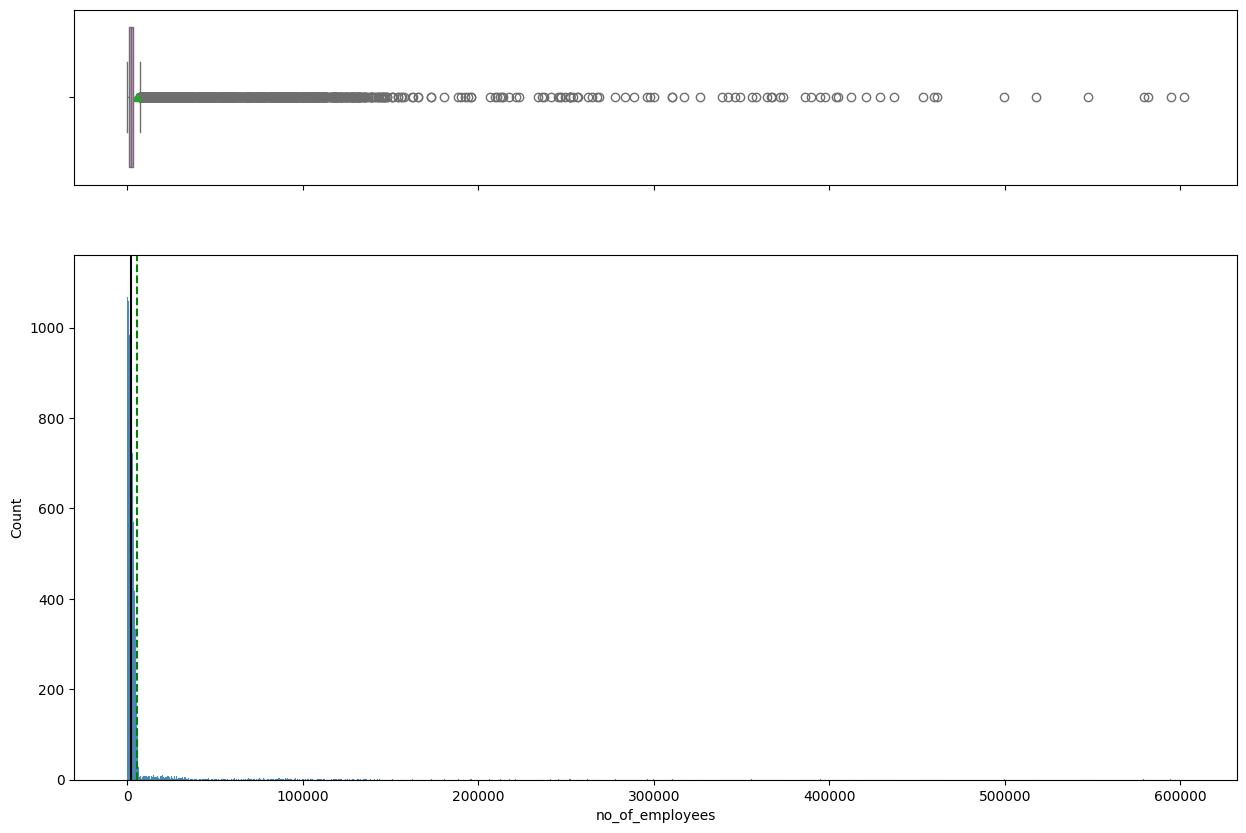

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

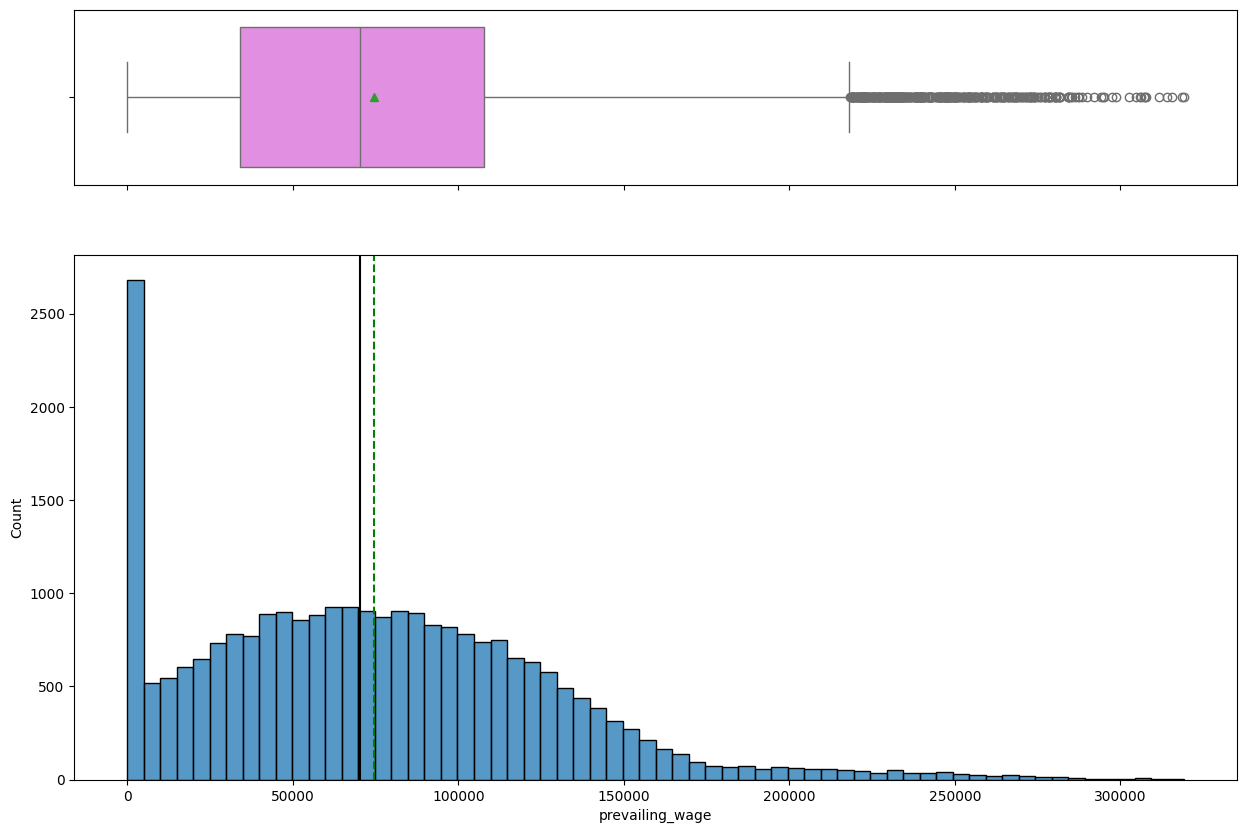

In [ ]:
histogram_boxplot(data,'prevailing_wage') ## Complete the code to create histogram_boxplot for prevailing wage

In [ ]:
# checking the observations which have less than 100 prevailing wage
#data.loc['_______'] ## Complete the code to find the rows with less than 100 prevailing wage

data_less_than_100_wage = data[data['prevailing_wage'] < 100]
print(data_less_than_100_wage)

           continent education_of_employee has_job_experience  \
338             Asia            Bachelor's                  Y   
634             Asia              Master's                  N   
839             Asia           High School                  Y   
876    South America            Bachelor's                  Y   
995             Asia              Master's                  N   
...              ...                   ...                ...   
25023           Asia            Bachelor's                  N   
25258           Asia            Bachelor's                  Y   
25308  North America              Master's                  N   
25329         Africa            Bachelor's                  N   
25461           Asia              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
338                       N             2114         2012   
634                       N              834         1977   
839                       N         

In [ ]:
#data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].'_______' ## Complete the code to get the count of the values in the mentioned column
unit_of_wage_counts = data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()
print(unit_of_wage_counts)


unit_of_wage
Hour    176
Name: count, dtype: int64


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

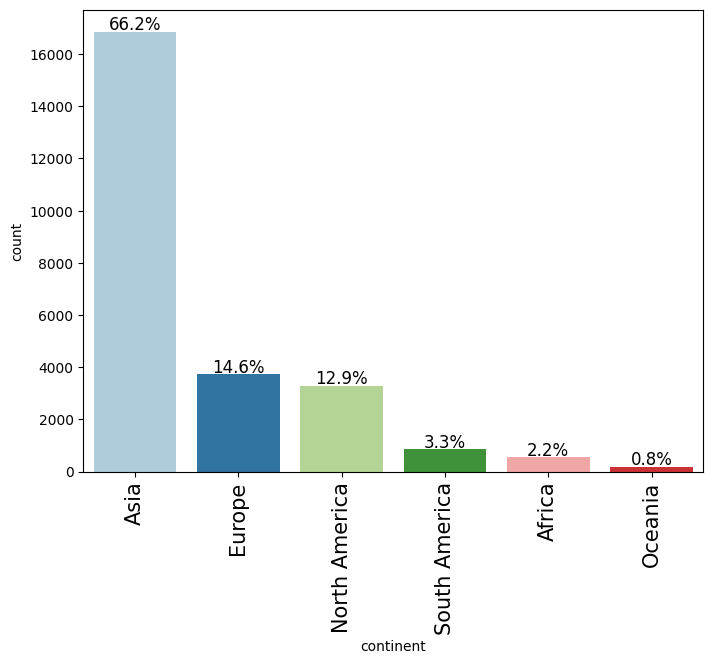

In [ ]:
labeled_barplot(data, "continent", perc=True)

#### Observations on education of employee

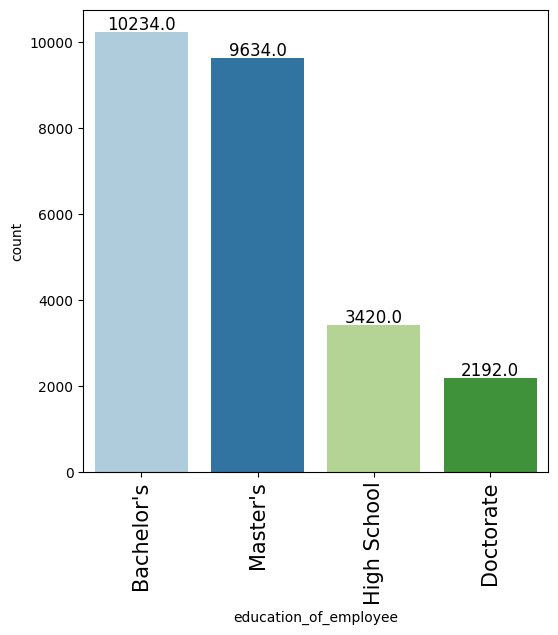

In [ ]:
labeled_barplot(data, 'education_of_employee')  ## Complete the code to create labeled_barplot for education of employee

In [ ]:
# checking the observations which have less than 100 prevailing wage
#data.loc['_______'] ## Complete the code to find the rows with less than 100 prevailing wage

data_less_than_100_wage = data[data['prevailing_wage'] < 100]
print(data_less_than_100_wage)

           continent education_of_employee has_job_experience  \
338             Asia            Bachelor's                  Y   
634             Asia              Master's                  N   
839             Asia           High School                  Y   
876    South America            Bachelor's                  Y   
995             Asia              Master's                  N   
...              ...                   ...                ...   
25023           Asia            Bachelor's                  N   
25258           Asia            Bachelor's                  Y   
25308  North America              Master's                  N   
25329         Africa            Bachelor's                  N   
25461           Asia              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
338                       N             2114         2012   
634                       N              834         1977   
839                       N         

#### Observations on job experience

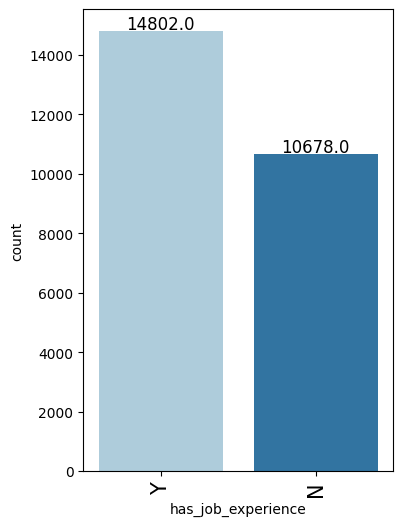

In [ ]:
labeled_barplot(data,'has_job_experience')  ## Complete the code to create labeled_barplot for job experience

#### Observations on job training

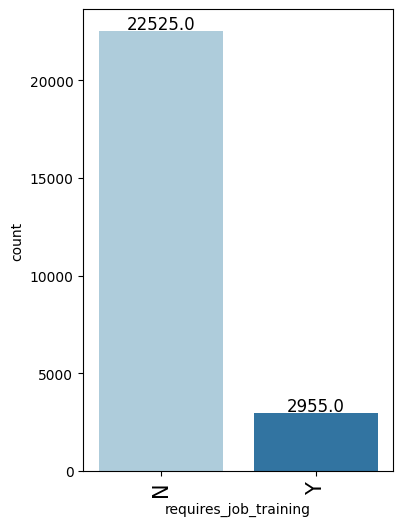

In [ ]:
labeled_barplot(data,'requires_job_training')  ## Complete the code to create labeled_barplot for job training

#### Observations on region of employment

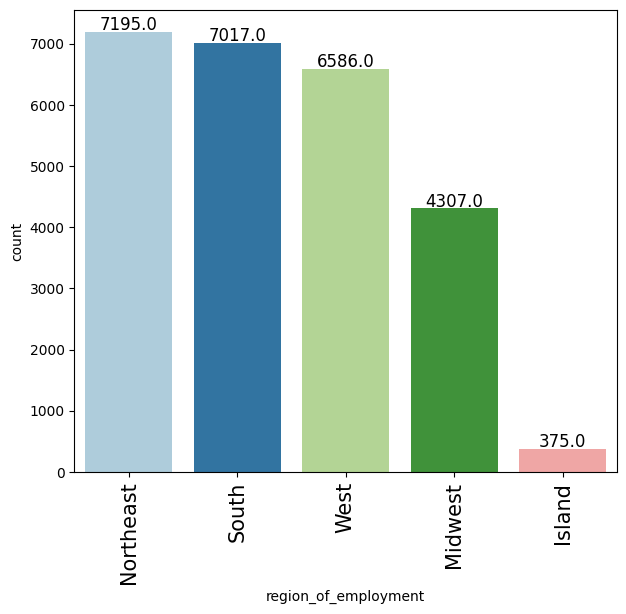

In [ ]:
labeled_barplot(data,'region_of_employment')  ## Complete the code to create labeled_barplot for region of employment

#### Observations on unit of wage

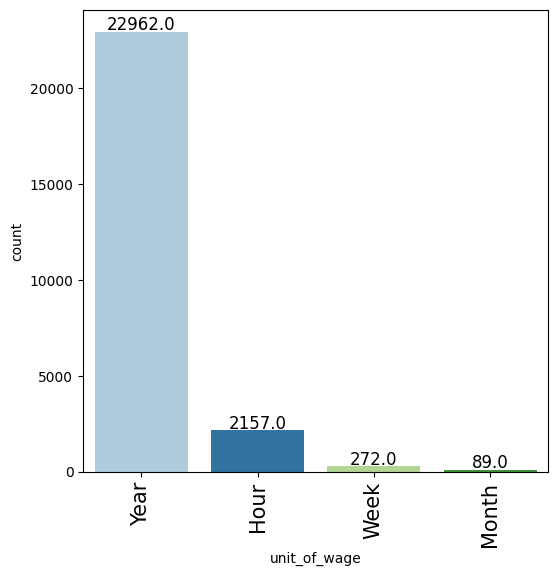

In [ ]:
labeled_barplot(data,'unit_of_wage')  ## Complete the code to create labeled_barplot for unit of wage

#### Observations on case status

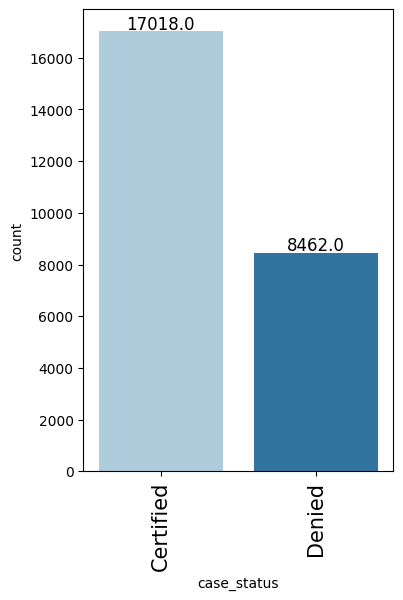

In [ ]:
labeled_barplot(data,'case_status')  ## Complete the code to create labeled_barplot for case status

### Bivariate Analysis

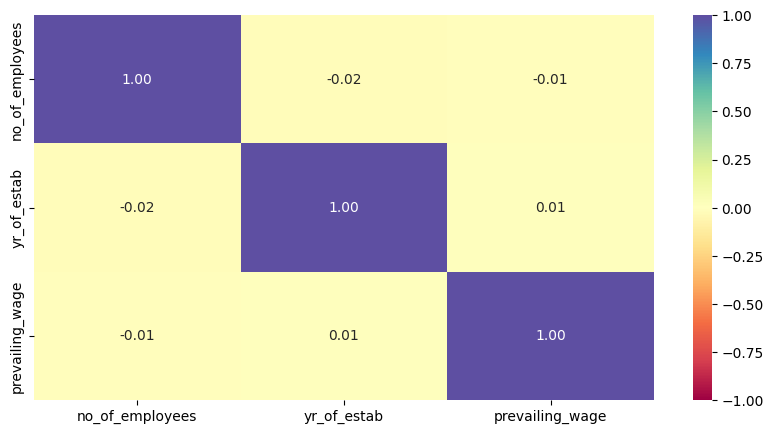

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


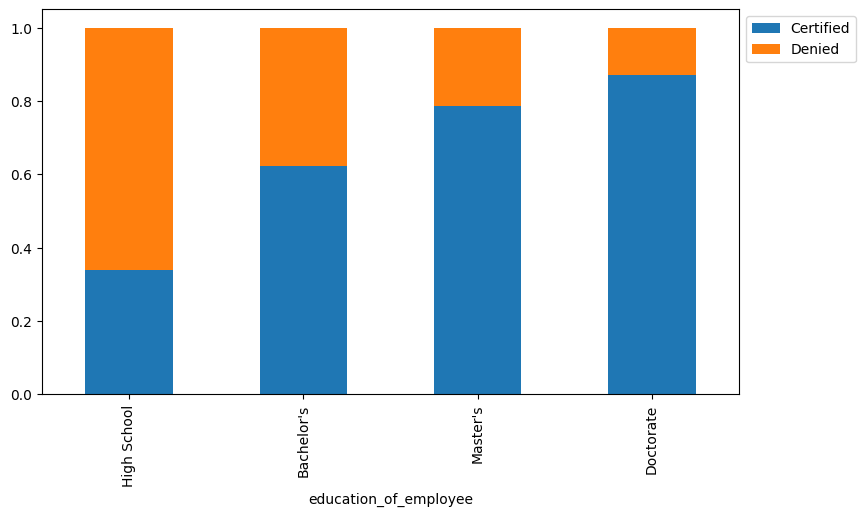

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

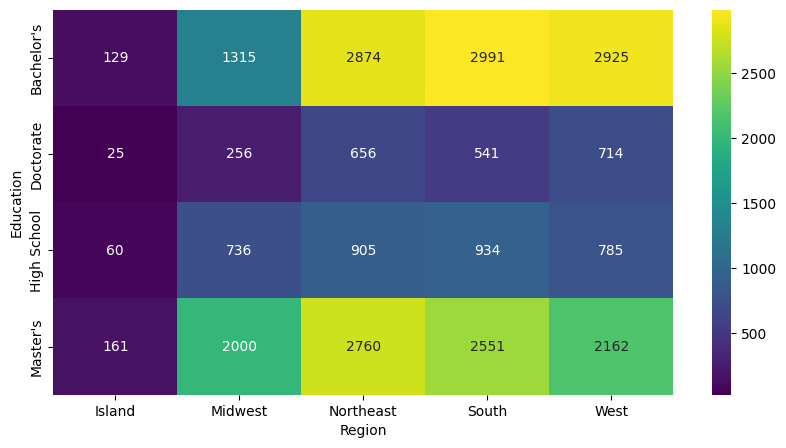

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()


#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


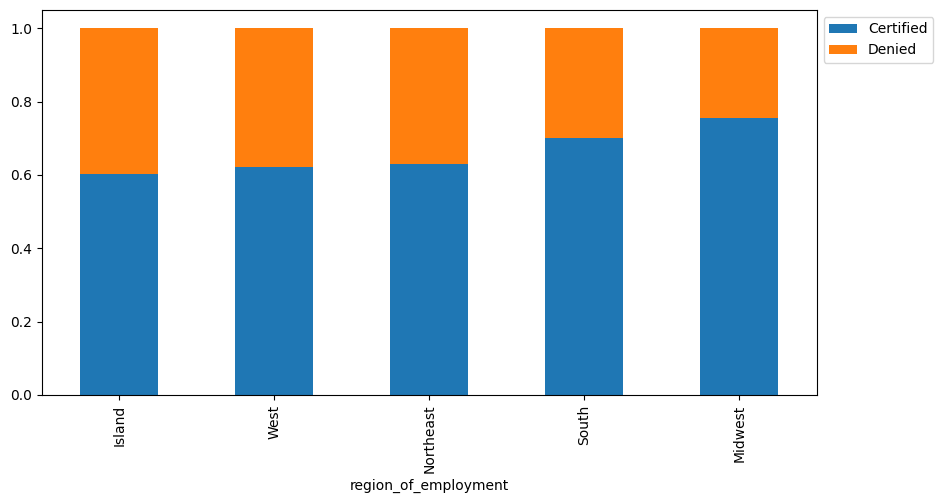

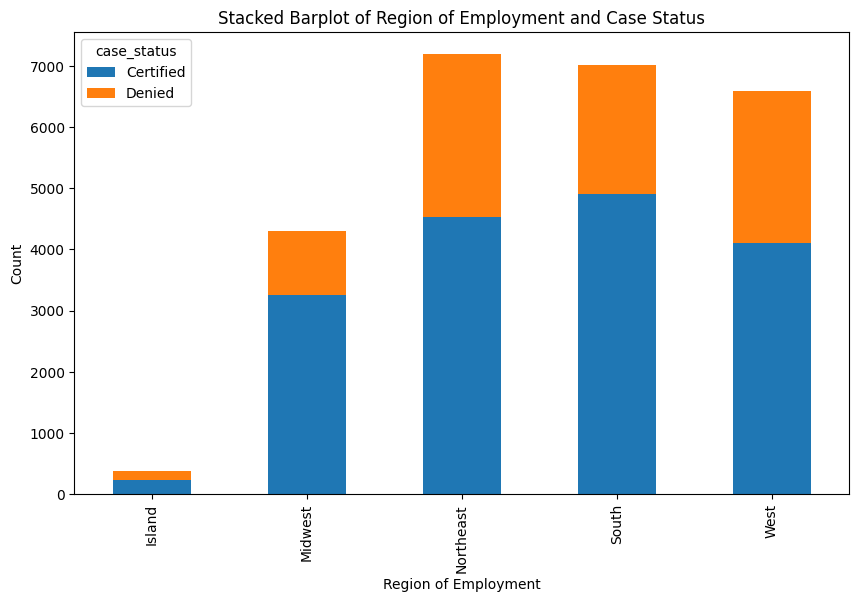

In [ ]:
stacked_barplot(data,'region_of_employment', 'case_status') ## Complete the code to plot stacked barplot for region of employment and case status
# Using pd.crosstab to get the frequency of each case status for each region of employment
cross_tab = pd.crosstab(data['region_of_employment'], data['case_status'])

# Plotting stacked barplot
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Region of Employment')
plt.ylabel('Count')
plt.title('Stacked Barplot of Region of Employment and Case Status')

# Showing plot
plt.show()


#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


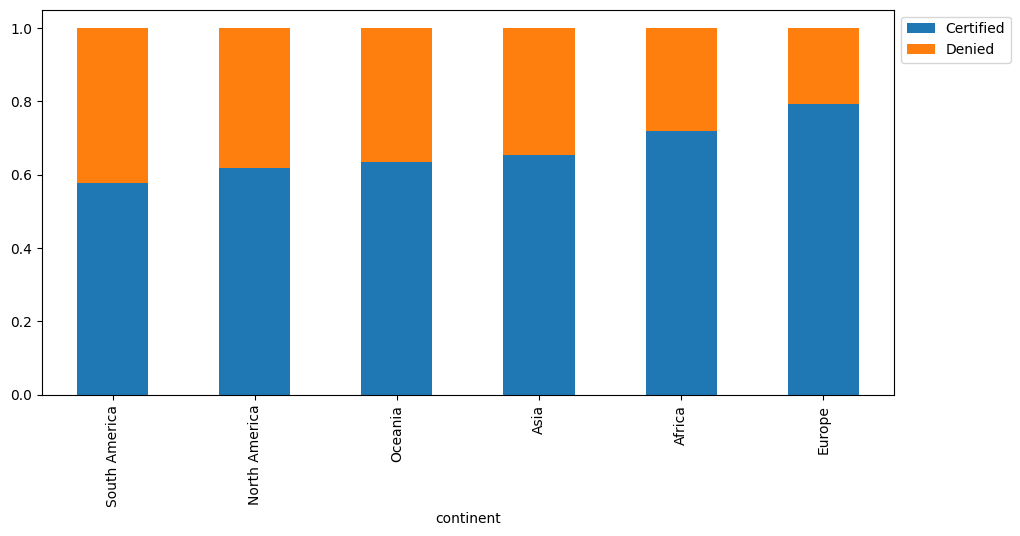

In [ ]:
stacked_barplot(data,'continent', 'case_status')## Complete the code to plot stacked barplot for continent and case status

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


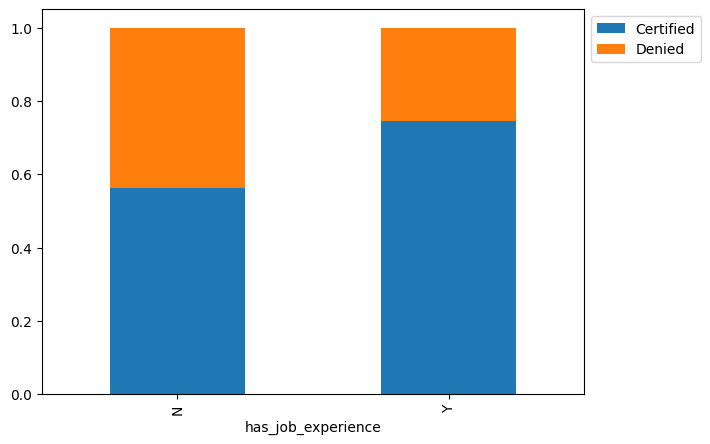

In [ ]:
stacked_barplot(data,'has_job_experience', 'case_status') ## Complete the code to plot stacked barplot for job experience and case status

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


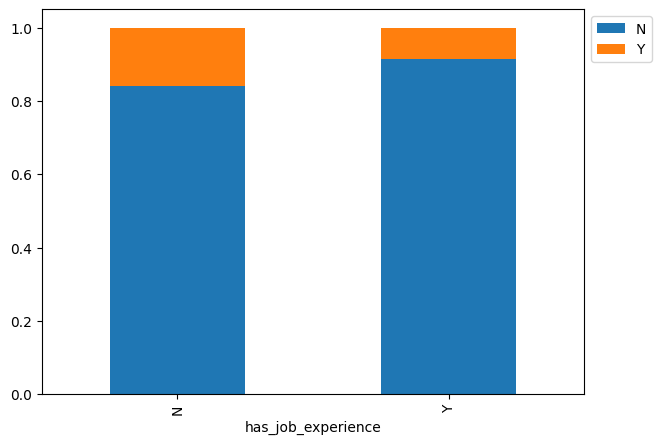

In [ ]:
stacked_barplot(data,'has_job_experience','requires_job_training') ## Complete the code to plot stacked barplot for job experience and requires_job_training

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

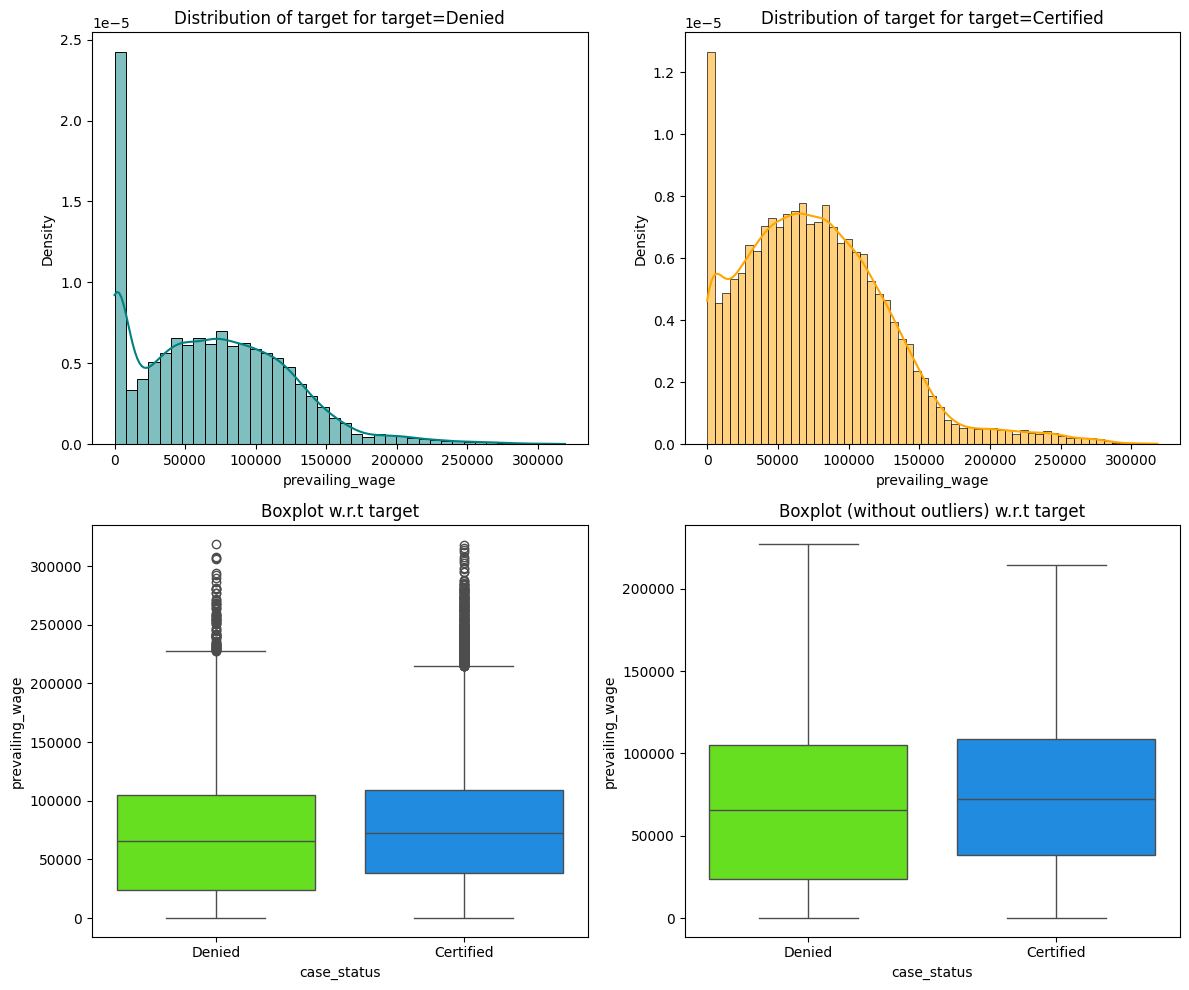

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage','case_status') ## Complete the code to find distribution of prevailing wage and case status

#### Checking if the prevailing wage is similar across all the regions of the US

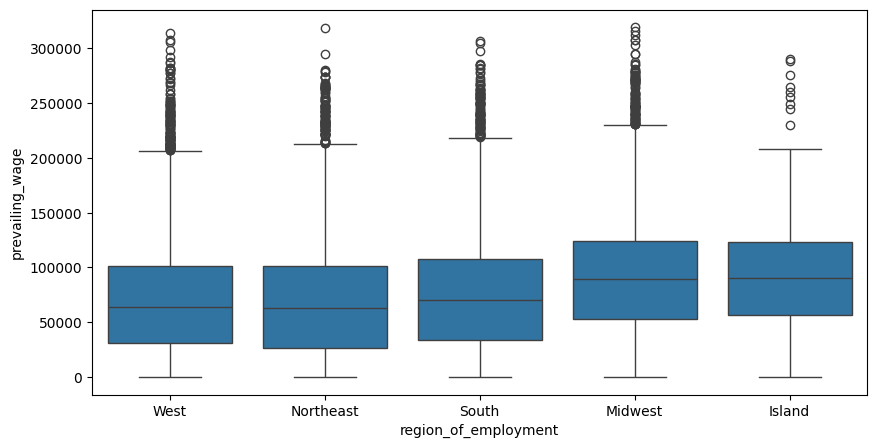

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data)
plt.show()


#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


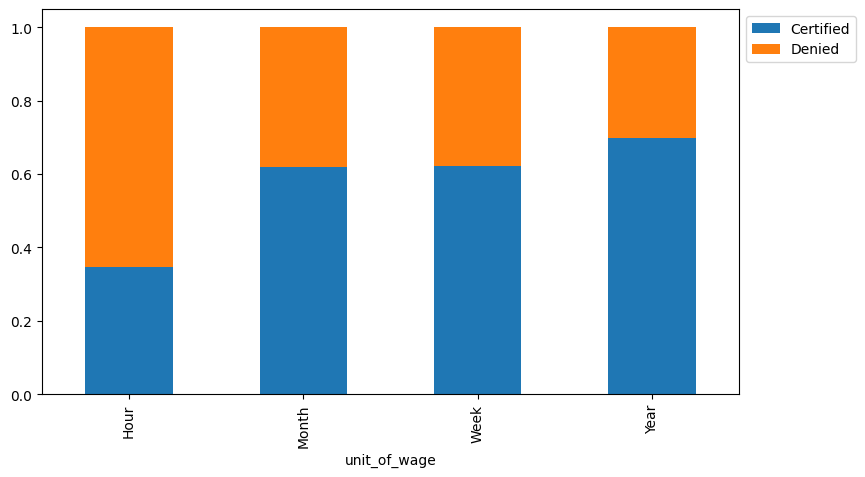

In [ ]:
stacked_barplot(data,'unit_of_wage','case_status') ## Complete the code to plot stacked barplot for unit of wage and case status

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

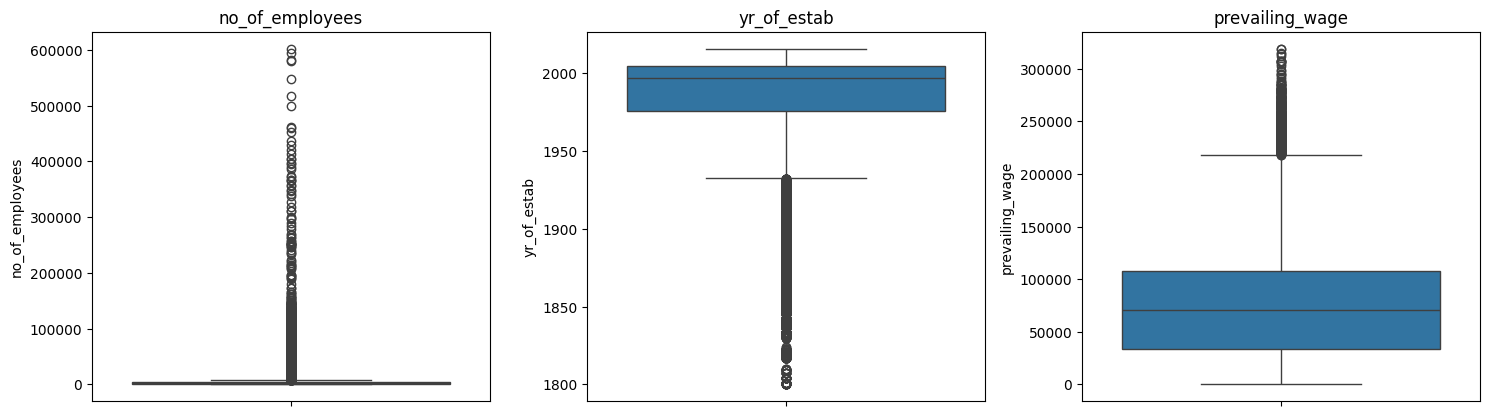

In [ ]:
# outlier detection using boxplot


numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)  # Adjust the subplot layout as needed
    sns.boxplot(data[variable])
    plt.title(variable)

plt.tight_layout()  # Adjust the layout spacing
plt.show()


### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
#data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

#X = data.'_______' ## Complete the code to drop case status from the data
#Y = data["case_status"]


#X = pd.'_______'  ## Complete the code to create dummies for X

# Splitting data in train and test sets
#X_train, X_test, y_train, y_test = train_test_split('_______', random_state=1, stratify=Y) ## Complete the code to split the data into train and test in the ratio 70:30

from sklearn.model_selection import train_test_split
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
# Drop 'case_status' from features (X)
X = data.drop('case_status', axis=1)
Y = data["case_status"]
# Create dummy variables for categorical features
X = pd.get_dummies(X)

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
#model = '_______' ## Complete the code to define decision tree classifier with random state = 1
#model.'_______' ## Complete the code to fit decision tree classifier on the train data

from sklearn.tree import DecisionTreeClassifier

# Define decision tree classifier with random_state = 1
#model = DecisionTreeClassifier(random_state=1)
model = DecisionTreeClassifier(random_state=1)

# Fit decision tree classifier on the train data
model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define decision tree classifier with random_state = 1
model = DecisionTreeClassifier(random_state=1)

# Fit decision tree classifier on the train data
model.fit(X_train, y_train)

# Evaluate model performance
model_performance = model_performance_classification_sklearn(model, X_train, y_train)
print(model_performance)
#confusion_matrix_sklearn(model_performance, X_train, y_train)


   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on training set

Confusion Matrix for Train Data:
[[ 5923     0]
 [    0 11913]]


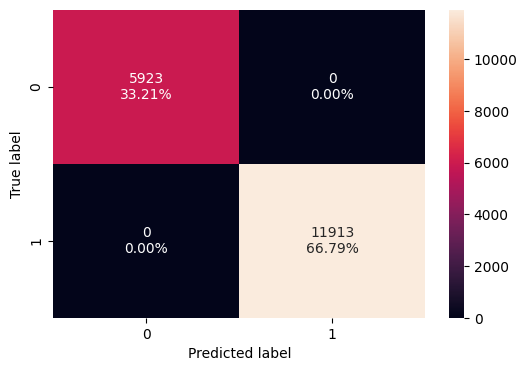

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(*cm.shape)  # Reshape according to the shape of the confusion matrix

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")



#confusion_matrix_sklearn('_______') ## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train)

from sklearn.metrics import confusion_matrix

# Predicting the labels for the train data
y_train_pred = model.predict(X_train)

# Creating confusion matrix for train data
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Train Data:")
print(confusion_matrix_train)


In [ ]:
#decision_tree_perf_train = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data


decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

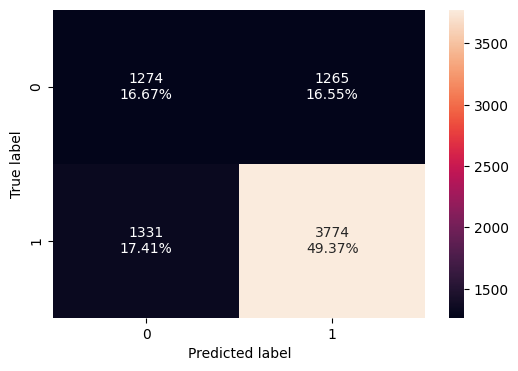

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)


In [ ]:
#decision_tree_perf_test = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data


decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.660387,0.739275,0.748958,0.744085


#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
#dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = '_______' ## Complete the code to run grid search with n_jobs = -1

#grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
#dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#dtree_estimator.fit(X_train, y_train)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

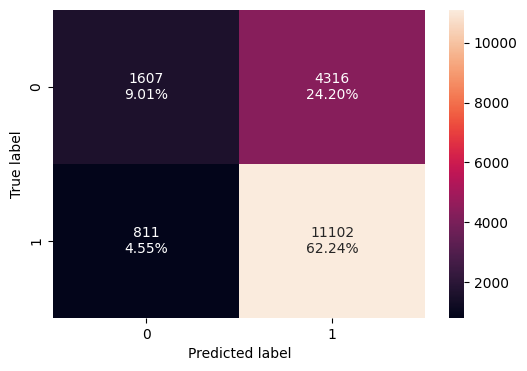

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(dtree_estimator, X_train, y_train)


In [ ]:
#dtree_estimator_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator


dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


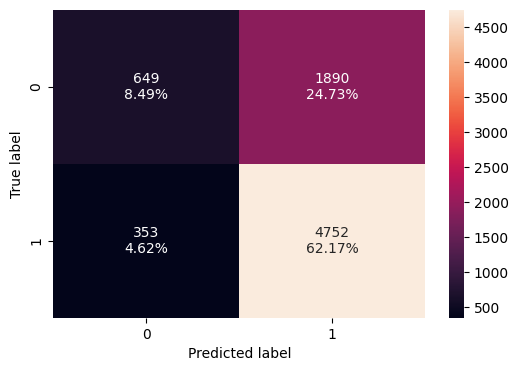

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data on tuned estimator

confusion_matrix_sklearn(dtree_estimator, X_test, y_test)


In [ ]:
#dtree_estimator_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)

dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
#bagging_classifier = '_______' ## Complete the code to define bagging classifier with random state = 1
#bagging_classifier.'_______' ## Complete the code to fit bagging classifier on the train data

from sklearn.ensemble import BaggingClassifier

# Define Bagging classifier with random state = 1
bagging_classifier = BaggingClassifier(random_state=1)

# Fit Bagging classifier on the train data
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(random_state=1)

#### Checking model performance on training set

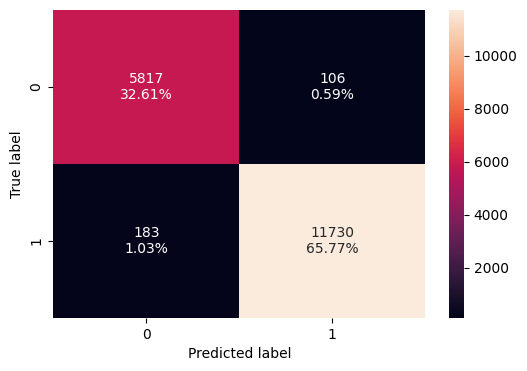

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)


In [ ]:
#bagging_classifier_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data


bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.983797,0.984639,0.991044,0.987831


#### Checking model performance on test set

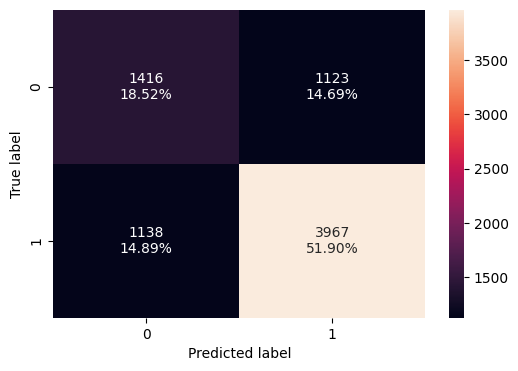

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)


In [ ]:
#bagging_classifier_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)

bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.704212,0.777081,0.779371,0.778225


### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
#bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = '_______' ## Complete the code to run grid search with cv = 5
#grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
#bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#bagging_estimator_tuned.fit(X_train, y_train)

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5, 0.7, 1],
    "n_estimators": np.arange(50, 110, 25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

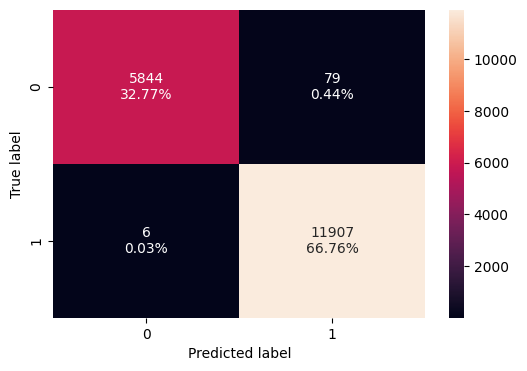

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)


In [ ]:
#bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)

bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995234,0.999496,0.993409,0.996443


#### Checking model performance on test set

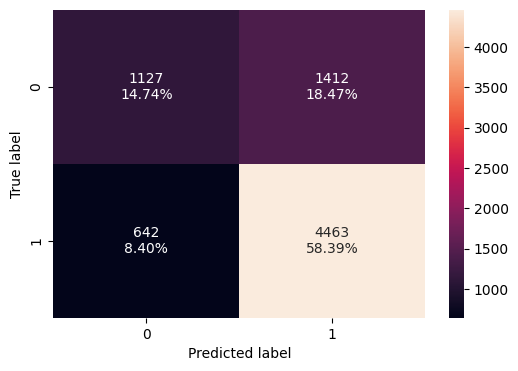

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)


In [ ]:
#bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)

bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731293,0.874241,0.75966,0.812933


### Random Forest

In [ ]:
# Fitting the model
#rf_estimator = '_______' ## Complete the code to define random forest with random state = 1 and class_weight = balanced
#rf_estimator.'_______' ## Complete the code to fit random forest on the train data


from sklearn.ensemble import RandomForestClassifier

# Define Random Forest classifier with random state = 1 and class_weight = balanced
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')

# Fit Random Forest classifier on the train data
rf_estimator.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

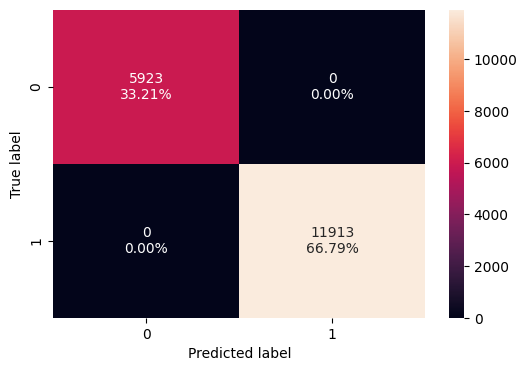

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)


In [ ]:
# Calculating different metrics
#rf_estimator_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)

rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

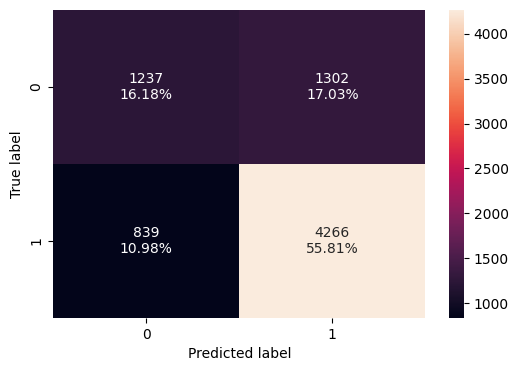

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)


In [ ]:
#rf_estimator_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data

rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.719911,0.835651,0.766164,0.7994


### Hyperparameter Tuning - Random Forest

In [ ]:
# Choose the type of classifier.
#rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = '_______' ## Complete the code to run grid search with cv = 5 and n_jobs = -1
##grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
#rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#rf_tuned.fit(X_train, y_train)


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Choose the type of classifier
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Define the grid of parameters to search over
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_tuned to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=30, oob_score=True, random_state=1)

#### Checking model performance on training set

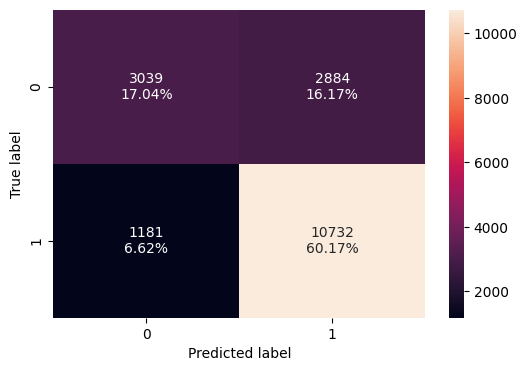

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)


In [ ]:
#rf_tuned_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for train data on tuned estimator


rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.77209,0.900865,0.78819,0.840769


#### Checking model performance on test set

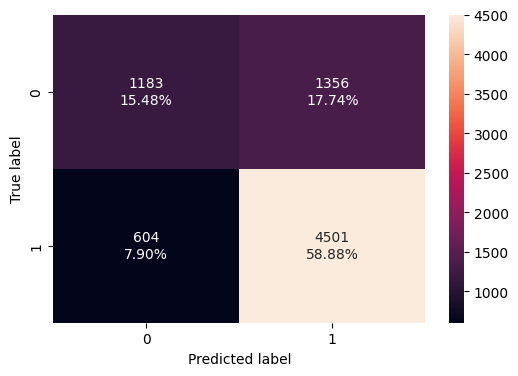

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
#rf_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator


rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74359,0.881685,0.768482,0.821201


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
#ab_classifier = '_______' ## Complete the code to define AdaBoost Classifier with random state = 1
#ab_classifier.'_______' ## Complete the code to fit AdaBoost Classifier on the train data

from sklearn.ensemble import AdaBoostClassifier

# Define AdaBoost Classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)

# Fit AdaBoost Classifier on the train data
ab_classifier.fit(X_train, y_train)


AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

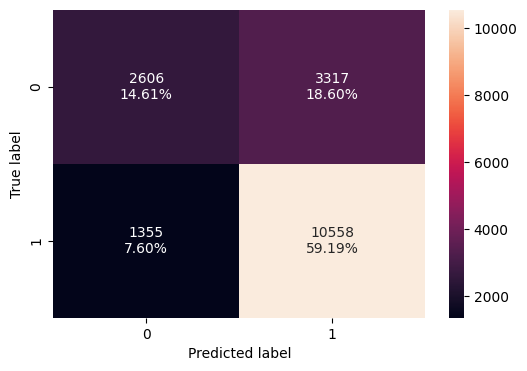

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train) ## Complete the code to check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738058,0.886259,0.760937,0.81883


#### Checking model performance on test set

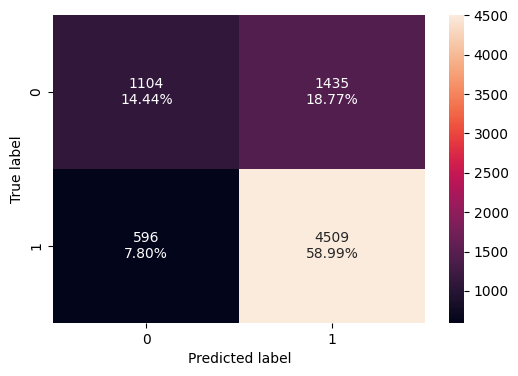

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test) ## Complete the code to check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.883252,0.75858,0.816182


### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
##abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
#acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = '_______' ## Complete the code to run grid search with cv = 5
#grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
##abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#abc_tuned.fit(X_train, y_train)


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Choose the type of classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": np.arange(0.01, 0.1, 0.05),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the abc_tuned to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)


ValueError: Invalid parameter 'base_estimator' for estimator AdaBoostClassifier(random_state=1). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

#### Checking model performance on training set

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_train, y_train)


In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
abc_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
abc_tuned_model_test_perf

### Gradient Boosting Classifier

In [ ]:





import xgboost as xgb

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=1)

# Define the parameter grid
parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_classifier, parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the xgb_classifier to the best combination of parameters
xgb_classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate performance
train_performance = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
test_performance = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)

# Confusion matrix
conf_matrix_train = confusion_matrix_sklearn(xgb_classifier, X_train, y_train)
conf_matrix_test = confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

print("Train Performance:")
print(train_performance)
print("Test Performance:")
print(test_performance)
print("Confusion Matrix for Train Data:")
print(conf_matrix_train)
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)



#### Checking model performance on training set

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data
xgb_tuned = xgb_classifier
# Create confusion matrix for train data
confusion_matrix_train = confusion_matrix(y_train, xgb_tuned.predict(X_train))
print("Confusion Matrix for Train Data:")
print(confusion_matrix_train)


In [ ]:
#gb_classifier_model_train_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance on train data
#gb_classifier_model_train_perf

gb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
gb_classifier_model_train_perf


#### Checking model performance on test set

In [ ]:
#'_______' ## Complete the code to create confusion matrix for test data
# Create confusion matrix for test data
confusion_matrix_test = confusion_matrix(y_test, xgb_classifier.predict(X_test))
print("Confusion Matrix for Test Data:")
print(confusion_matrix_test)


In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
from pickle import NONE
# Choose the type of classifier.
#gbc_tuned = GradientBoostingClassifier(
 #   init=AdaBoostClassifier(random_state=1), random_state=1
#)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}


# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)
#gbc_tuned = GradientBoostingClassifier(init=None, random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "subsample": [0.7, 0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)
#acc_scorer = metrics.make_scorer(0.82135)
# Run the grid search
# Run the grid search
#grid_obj = '_______' ## Complete the code to run grid search with cv = 5
#grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the gbc_tuned to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)


#### Checking model performance on training set

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data on tuned estimator
gb_classifier_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gb_classifier_model_test_perf


In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data on tuned estimator

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [ ]:
#xgb_classifier = '_______' ## Complete the code to define XGBoost Classifier with random state = 1 and eval_metric="logloss"
#xgb_classifier.'_______' ## Complete the code to fit XGBoost Classifier on the train data

from xgboost import XGBClassifier

# Define XGBoost Classifier with random state = 1 and eval_metric="logloss"
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")

# Fit XGBoost Classifier on the train data
xgb_classifier.fit(X_train, y_train)


#### Checking model performance on training set

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) ## Complete the code to check performance on train data
xgb_classifier_model_train_perf

#### Checking model performance on test set

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test) ## Complete the code to create confusion matrix for test data
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test) ## Complete the code to check performance for test data
xgb_classifier_model_test_perf

### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = '_______' ## Complete the code to run grid search with cv = 5
#grid_obj = grid_obj.'_______' ## Complete the code to fit the grid_obj on train data
# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the xgb_tuned to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)


# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data on tuned estimator
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf

#### Checking model performance on test set

In [ ]:
#'______' ## Complete the code to create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)


In [ ]:
#xgb_tuned_model_test_perf = model_performance_classification_sklearn('_______') ## Complete the code to check performance for test data on tuned estimator
#xgb_tuned_model_test_perf

xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

## Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", xgb_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

#stacking_classifier = '_______' ## Complete the code to define Stacking Classifier

#stacking_classifier.'_______' ## Complete the code to fit Stacking Classifier on the train data

from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train, y_train)


In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

#stacking_classifier = '_______' ## Complete the code to define Stacking Classifier

#stacking_classifier.'_______' ## Complete the code to fit Stacking Classifier on the train data

from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_classifier.fit(X_train, y_train)

### Checking model performance on training set

In [ ]:
#'_______' ## Complete the code to create confusion matrix for train data
confusion_matrix_train_stacking = confusion_matrix_sklearn(stacking_classifier, X_train, y_train)


In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
## Complete the code to check performance on train data
stacking_classifier_model_train_perf

### Checking model performance on test set

In [ ]:
'_______' ## Complete the code to create confusion matrix for test data
confusion_matrix_train_stacking = confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test) ## Complete the code to check performance for test data
stacking_classifier_model_test_perf

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# @title Tuned Bagging Classifier

from matplotlib import pyplot as plt
models_train_comp_df['Tuned Bagging Classifier'].plot(kind='line', figsize=(8, 4), title='Tuned Bagging Classifier')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# testing performance comparison

#'_______' ## Complete the code to check performance for test data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

### Important features of the final model

In [ ]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

-


___

In [ ]:
!pip install mlrose-hiive

In [ ]:
!pip install scikit-learn

In [ ]:
!pip uninstall joblib -y
!pip install joblib

In [ ]:
import joblib
print(joblib.__version__)

In [ ]:
!pip install joblib==1.2.0

In [ ]:
!pip uninstall mlrose_hiive -y
!pip install mlrose_hiive
import mlrose_hiive as mlrose

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd

# Example: Assuming `data` is your dataset

# Split into features and target
X = data.drop('case_status', axis=1)  # 'case_status' is the target variable
y = data['case_status']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List categorical columns that need encoding
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
                    'requires_job_training', 'region_of_employment', 'unit_of_wage',
                    'full_time_position']

# Create the column transformer to handle preprocessing (encoding + scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['no_of_employees', 'yr_of_estab', 'prevailing_wage']),  # Numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # Categorical columns
    ])

# Apply the transformation (fit on train and apply to both train and test)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Now your X_train and X_test are ready for modeling!


# Define a neural network (or any model) using RHC
nn_model = mlrose.NeuralNetwork(hidden_nodes=[5], activation='relu',
                                 algorithm='random_hill_climb', max_iters=1000,
                                 bias=True, is_classifier=True,
                                 learning_rate=0.001, early_stopping=True,
                                 random_state=42)

# Fit the model
nn_model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the RHC model: {accuracy}')


Accuracy of the RHC model: 0.38324175824175827


In [ ]:
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score
# Defining the Logistic Regression problem with RHC
# Here, RHC is used to optimize the weights for logistic regression
model = mlrose.NeuralNetwork(hidden_nodes=[], activation='relu', algorithm='random_hill_climb',
                             max_iters=1000, bias=True, is_classifier=True, learning_rate=0.0001,
                             early_stopping=True, max_attempts=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RHC-optimized model: {accuracy}")


Accuracy of RHC-optimized model: 0.3981554160125589


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Assuming you already have the cleaned dataset ready
#data = pd.read_csv("easyvisa.csv")

# Encode categorical variables (use OneHotEncoder or LabelEncoder based on the model)
data = pd.get_dummies(data, columns=['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position'])

# Split data into features (X) and target (y)
X = data.drop(columns=['case_id', 'case_status'])  # Drop 'case_id' and 'case_status' for features
y = data['case_status']  # 'case_status' is the target

# Encode target labels if necessary
y = y.map({'Certified': 1, 'Denied': 0})

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, activation='relu', solver='adam', random_state=42)

# Train the model
nn_model.fit(X_train, y_train)
# Make predictions
y_pred = nn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Neural Network model: {accuracy}")

# Optional: Display detailed classification report
print(classification_report(y_test, y_pred))



KeyError: "None of [Index(['continent', 'education_of_employee', 'has_job_experience',\n       'requires_job_training', 'region_of_employment', 'unit_of_wage',\n       'full_time_position'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Train the model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train, y_train)
# Make predictions
y_pred = nn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Neural Network model: {accuracy}")

# Optional: Display detailed classification report
print(classification_report(y_test, y_pred))

Accuracy of the Neural Network model: 0.7050627943485086
              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1695
           1       0.77      0.79      0.78      3401

    accuracy                           0.71      5096
   macro avg       0.67      0.66      0.66      5096
weighted avg       0.70      0.71      0.70      5096



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your data (assuming the EasyVisa dataset is in a CSV file)
#data = pd.read_csv("easyvisa.csv")

# Preprocess data: encode categorical variables and split into features and target
#data = pd.get_dummies(data, columns=['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position'])
X = data.drop(columns=['case_id', 'case_status'])  # Features
y = data['case_status'].map({'Certified': 1, 'Denied': 0})  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, activation='relu', solver='adam', random_state=42)
nn_model.fit(X_train, y_train)

# Predict outcomes on the test data
y_pred = nn_model.predict(X_test)

# Evaluate the model performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Neural Network model on test data: {accuracy}")

# Optional: Display detailed classification report for test predictions
print(classification_report(y_test, y_pred))


Accuracy of the Neural Network model on test data: 0.7050627943485086
              precision    recall  f1-score   support

           0       0.56      0.53      0.54      1695
           1       0.77      0.79      0.78      3401

    accuracy                           0.71      5096
   macro avg       0.67      0.66      0.66      5096
weighted avg       0.70      0.71      0.70      5096



In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Step 1: Load and prepare your dataset
# Assuming df is your DataFrame containing the EasyVisa data
df = data.copy()
X = df.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = df['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric if necessary

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=1, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Step 3: Define the objective function for Simulated Annealing
def objective_function(params):
    learning_rate = params[0]
    hidden_layers = int(params[1])
    neurons = int(params[2])

    model = create_model(learning_rate, hidden_layers, neurons)
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)  # Adjust epochs and batch_size as needed
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy  # Return the accuracy as the objective value

# Step 4: Simulated Annealing
def simulated_annealing():
    # Initial parameters
    current_solution = [0.001, 1, 10]  # [learning_rate, hidden_layers, neurons]
    current_value = objective_function(current_solution)

    best_solution = current_solution
    best_value = current_value

    # Simulated Annealing parameters
    temperature = 1.0
    cooling_rate = 0.99
    max_iterations = 100

    for i in range(max_iterations):
        # Generate a new solution by perturbing the current solution
        new_solution = [
            max(0.0001, min(0.1, current_solution[0] + np.random.normal(0, 0.01))),  # Learning rate
            max(1, min(5, current_solution[1] + np.random.randint(-1, 2))),  # Hidden layers
            max(1, min(100, current_solution[2] + np.random.randint(-5, 6)))  # Neurons
        ]

        new_value = objective_function(new_solution)

        # Accept or reject the new solution
        if new_value > current_value or np.random.rand() < np.exp((new_value - current_value) / temperature):
            current_solution = new_solution
            current_value = new_value

            # Update the best solution found
            if new_value > best_value:
                best_solution = new_solution
                best_value = new_value

        # Cool down the temperature
        temperature *= cooling_rate

    return best_solution, best_value

# Run the Simulated Annealing optimization
best_params, best_accuracy = simulated_annealing()
print(f"Best Parameters: Learning Rate: {best_params[0]}, Hidden Layers: {int(best_params[1])}, Neurons: {int(best_params[2])}")
print(f"Best Accuracy: {best_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load and prepare your dataset
# Assuming df is your DataFrame containing the EasyVisa data
df = data.copy()
X = df.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = df['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric if necessary

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=1, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Initialize the model
model = create_model()

# Step 3: Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Step 4: Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 0.0
Test Accuracy: 0.0


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Step 1: Load and prepare your dataset
# Assuming df is your DataFrame containing the EasyVisa data
df = data.copy()
X = df.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = df['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric if necessary

# Apply one-hot encoding to categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 2: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=2, neurons=20):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Initialize the model
model = create_model()

# Step 3: Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)  # Increased epochs and batch size

# Step 4: Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Step 1: Load and prepare your dataset
# Assuming df is your DataFrame containing the EasyVisa data
df = data.copy()

# Define X and y
X = df.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = df['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric if necessary

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Step 2: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 3: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=2, neurons=20):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Initialize the model
model = create_model()

# Step 4: Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Step 5: Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.0
Test Accuracy: 0.0


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Load and prepare your dataset
# Assuming df1 is your DataFrame containing the EasyVisa data
df1 = data.copy()
X = df1.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = df1['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric if necessary

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Step 2: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 3: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=1, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Step 4: Define the fitness function
def fitness_function(params):
    learning_rate = params[0]
    hidden_layers = int(params[1])
    neurons = int(params[2])

    model = create_model(learning_rate, hidden_layers, neurons)
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)  # Adjust epochs and batch_size as needed
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy  # Return the accuracy as the fitness value

# Step 5: Genetic Algorithm
def genetic_algorithm(population_size=10, generations=10):
    # Initialize population
    population = np.random.rand(population_size, 3)  # [learning_rate, hidden_layers, neurons]
    population[:, 0] = population[:, 0] * 0.1  # Learning rate between 0 and 0.1
    population[:, 1] = (population[:, 1] * 4 + 1).astype(int)  # Hidden layers between 1 and 5
    population[:, 2] = (population[:, 2] * 99 + 1).astype(int)  # Neurons between 1 and 100

    for generation in range(generations):
        # Evaluate fitness
        fitness_scores = np.array([fitness_function(individual) for individual in population])

        # Selection
        selected_indices = fitness_scores.argsort()[-5:]  # Select top 5 individuals
        selected_population = population[selected_indices]

        # Crossover
        offspring = []
        for _ in range(population_size - len(selected_population)):
            parent1, parent2 = selected_population[np.random.choice(len(selected_population), 2, replace=False)]
            child = [(parent1[i] + parent2[i]) / 2 for i in range(3)]
            offspring.append(child)

        # Mutation
        for i in range(len(offspring)):
            if np.random.rand() < 0.2:  # Mutation chance
                offspring[i][0] += np.random.normal(0, 0.01)  # Mutate learning rate
                offspring[i][1] += np.random.randint(-1, 2)  # Mutate hidden layers
                offspring[i][2] += np.random.randint(-5, 6)  # Mutate neurons
                offspring[i][0] = max(0.0001, min(0.1, offspring[i][0]))  # Ensure valid range
                offspring[i][1] = max(1, min(5, offspring[i][1]))  # Ensure valid hidden layers
                offspring[i][2] = max(1, min(100, offspring[i][2]))  # Ensure valid neurons

        # Create new population
        population = np.vstack((selected_population, offspring))

    # Get the best solution
    best_index = fitness_scores.argsort()[-1]
    best_solution = population[best_index]
    best_value = fitness_function(best_solution)

    return best_solution, best_value

# Run the Genetic Algorithm optimization
best_params, best_accuracy = genetic_algorithm()
print(f"Best Parameters: Learning Rate: {best_params[0]}, Hidden Layers: {int(best_params[1])}, Neurons: {int(best_params[2])}")
print(f"Best Accuracy: {best_accuracy}")


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Step 1: Load and prepare your dataset
df1 = data.copy()  # Assuming `data` contains the EasyVisa dataset
X = df1.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = df1['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Step 2: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 3: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=1, neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Step 4: Implement Randomized Hill Climbing (RHC)
def randomized_hill_climbing():
    best_params = [0.001, 1, 10]  # Initial random guess [learning_rate, hidden_layers, neurons]
    best_accuracy = 0

    for _ in range(50):  # Perform 50 iterations of RHC
        learning_rate = best_params[0] + np.random.normal(0, 0.0005)  # Slightly adjust learning rate
        hidden_layers = best_params[1] + np.random.randint(-1, 2)  # Adjust hidden layers
        neurons = best_params[2] + np.random.randint(-5, 6)  # Adjust neurons

        model = create_model(learning_rate, hidden_layers, neurons)
        model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = [learning_rate, hidden_layers, neurons]

    return best_params, best_accuracy

# Step 5: Implement Simulated Annealing (SA)
def simulated_annealing():
    current_solution = [0.001, 1, 10]
    current_value = 0
    temperature = 1.0
    cooling_rate = 0.99

    for _ in range(50):
        learning_rate = current_solution[0] + np.random.normal(0, 0.0005)
        hidden_layers = current_solution[1] + np.random.randint(-1, 2)
        neurons = current_solution[2] + np.random.randint(-5, 6)

        model = create_model(learning_rate, hidden_layers, neurons)
        model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

        _, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Accept or reject based on Simulated Annealing
        if accuracy > current_value or np.random.rand() < np.exp((accuracy - current_value) / temperature):
            current_solution = [learning_rate, hidden_layers, neurons]
            current_value = accuracy

        temperature *= cooling_rate

    return current_solution, current_value

# Step 6: Implement Genetic Algorithm (GA)
def genetic_algorithm(population_size=10, generations=10):
    # Initialize population
    population = np.random.rand(population_size, 3)  # [learning_rate, hidden_layers, neurons]
    population[:, 0] = population[:, 0] * 0.1  # Learning rate between 0 and 0.1
    population[:, 1] = (population[:, 1] * 4 + 1).astype(int)  # Hidden layers between 1 and 5
    population[:, 2] = (population[:, 2] * 99 + 1).astype(int)  # Neurons between 1 and 100

    for generation in range(generations):
        # Evaluate fitness
        fitness_scores = np.array([fitness_function(individual) for individual in population])

        # Selection
        selected_indices = fitness_scores.argsort()[-5:]  # Select top 5 individuals
        selected_population = population[selected_indices]

        # Crossover
        offspring = []
        for _ in range(population_size - len(selected_population)):
            parent1, parent2 = selected_population[np.random.choice(len(selected_population), 2, replace=False)]
            child = [(parent1[i] + parent2[i]) / 2 for i in range(3)]
            offspring.append(child)

        # Mutation
        for i in range(len(offspring)):
            if np.random.rand() < 0.2:  # Mutation chance
                offspring[i][0] += np.random.normal(0, 0.01)  # Mutate learning rate
                offspring[i][1] += np.random.randint(-1, 2)  # Mutate hidden layers
                offspring[i][2] += np.random.randint(-5, 6)  # Mutate neurons
                offspring[i][0] = max(0.0001, min(0.1, offspring[i][0]))  # Ensure valid range
                offspring[i][1] = max(1, min(5, offspring[i][1]))  # Ensure valid hidden layers
                offspring[i][2] = max(1, min(100, offspring[i][2]))  # Ensure valid neurons

        # Create new population
        population = np.vstack((selected_population, offspring))

    # Get the best solution
    best_index = fitness_scores.argsort()[-1]
    best_solution = population[best_index]
    best_value = fitness_function(best_solution)

    return best_solution, best_value

# Fitness function used in Genetic Algorithm
def fitness_function(params):
    learning_rate = params[0]
    hidden_layers = int(params[1])
    neurons = int(params[2])

    model = create_model(learning_rate, hidden_layers, neurons)
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy

# Step 7: Run the algorithms and store the results
results = []

# Randomized Hill Climbing (RHC)
rhc_params, rhc_accuracy = randomized_hill_climbing()
results.append({'Algorithm': 'RHC', 'Train Accuracy': None, 'Test Accuracy': rhc_accuracy, 'Notes': 'Local search, may get stuck in local optimum'})

# Simulated Annealing (SA)
sa_params, sa_accuracy = simulated_annealing()
results.append({'Algorithm': 'SA', 'Train Accuracy': None, 'Test Accuracy': sa_accuracy, 'Notes': 'Global search, better exploration'})

# Genetic Algorithm (GA)
ga_params, ga_accuracy = genetic_algorithm()
results.append({'Algorithm': 'GA', 'Train Accuracy': None, 'Test Accuracy': ga_accuracy, 'Notes': 'Best global search, mutation helps in diversity'})

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


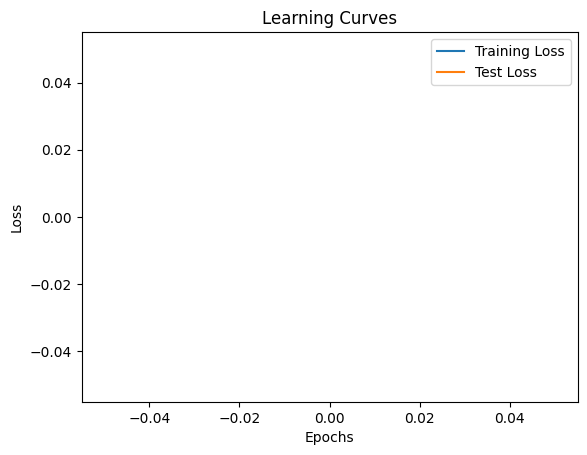

Final Train Accuracy: 0.0000, Final Test Accuracy: 0.0000


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Step 1: Load and prepare your dataset
# Assuming df is your DataFrame containing the EasyVisa data
dfcopy = data.copy()
X = dfcopy.drop(columns=['case_id', 'case_status'])  # Exclude ID and target
y = dfcopy['case_status'].map({'0': 0, '1': 1})  # Convert target to numeric if necessary

# Apply one-hot encoding to categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 2: Define the NN model
def create_model(learning_rate=0.001, hidden_layers=2, neurons=20):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Step 3: Fit the model and track performance
epochs = 100
train_losses = []
test_losses = []

model = create_model()

for epoch in range(epochs):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)  # Train for one epoch
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Step 4: Plot the learning curves
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print final accuracy for bias and variance analysis
final_train_loss, final_train_accuracy = model.evaluate(X_train, y_train, verbose=0)
final_test_loss, final_test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Final Train Accuracy: {final_train_accuracy:.4f}, Final Test Accuracy: {final_test_accuracy:.4f}")


In [ ]:
import numpy as np
import random

# Parameters
N = 100  # Length of the binary string
T = 20   # Threshold for the number of '0's before the first peak and after the last peak

# 4-Peaks fitness function
def fitness_4peaks(individual):
    peaks = 0
    n = len(individual)

    # Count the number of peaks
    for i in range(1, n-1):
        if individual[i] == 1 and individual[i-1] == 0 and individual[i+1] == 0:
            peaks += 1

    # Count the number of '0's before the first peak
    leading_zeros = 0
    for i in range(n):
        if individual[i] == 0:
            leading_zeros += 1
        else:
            break

    # Count the number of '0's after the last peak
    trailing_zeros = 0
    for i in range(n-1, -1, -1):
        if individual[i] == 0:
            trailing_zeros += 1
        else:
            break

    # Return fitness value
    return peaks + (T - min(leading_zeros, T)) + (T - min(trailing_zeros, T))

# Random Hill Climbing Algorithm
def random_hill_climbing(max_iterations=1000):
    current = np.random.randint(0, 2, size=N)  # Random binary string
    current_fitness = fitness_4peaks(current)

    for _ in range(max_iterations):
        neighbor = current.copy()
        pos = random.randint(0, N-1)
        neighbor[pos] = 1 - neighbor[pos]  # Flip the bit

        neighbor_fitness = fitness_4peaks(neighbor)
        if neighbor_fitness > current_fitness:
            current, current_fitness = neighbor, neighbor_fitness

    return current, current_fitness

# Simulated Annealing Algorithm
def simulated_annealing(max_iterations=1000, initial_temperature=100, cooling_rate=0.99):
    current = np.random.randint(0, 2, size=N)
    current_fitness = fitness_4peaks(current)

    temperature = initial_temperature

    for _ in range(max_iterations):
        neighbor = current.copy()
        pos = random.randint(0, N-1)
        neighbor[pos] = 1 - neighbor[pos]  # Flip the bit

        neighbor_fitness = fitness_4peaks(neighbor)
        acceptance_probability = np.exp((neighbor_fitness - current_fitness) / temperature)

        if neighbor_fitness > current_fitness or random.random() < acceptance_probability:
            current, current_fitness = neighbor, neighbor_fitness

        temperature *= cooling_rate  # Cool down

    return current, current_fitness

# Genetic Algorithm
def genetic_algorithm(population_size=100, generations=100, mutation_rate=0.01):
    population = [np.random.randint(0, 2, size=N) for _ in range(population_size)]

    for _ in range(generations):
        fitness_scores = [fitness_4peaks(ind) for ind in population]
        selected_indices = np.argsort(fitness_scores)[-population_size//2:]  # Select top half
        selected_population = [population[i] for i in selected_indices]

        offspring = []
        while len(offspring) < population_size:
            parent1, parent2 = random.sample(selected_population, 2)
            crossover_point = random.randint(1, N-1)
            child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])

            # Mutation
            for i in range(N):
                if random.random() < mutation_rate:
                    child[i] = 1 - child[i]

            offspring.append(child)

        population = offspring  # Replace population with offspring

    # Get the best solution
    best_solution = max(population, key=fitness_4peaks)
    best_fitness = fitness_4peaks(best_solution)
    return best_solution, best_fitness

# Run the algorithms
rhc_solution, rhc_fitness = random_hill_climbing()
sa_solution, sa_fitness = simulated_annealing()
ga_solution, ga_fitness = genetic_algorithm()

print("4-Peaks Problem Results:")
print(f"RHC Solution: {rhc_solution}, Fitness: {rhc_fitness}")
print(f"SA Solution: {sa_solution}, Fitness: {sa_fitness}")
print(f"GA Solution: {ga_solution}, Fitness: {ga_fitness}")


In [ ]:
import networkx as nx
import random

# Parameters
num_vertices = 10  # Number of vertices
num_edges = 15     # Number of edges
k_colors = 3       # Number of colors

# Generate a random graph
G = nx.gnm_random_graph(num_vertices, num_edges)

# k-Color fitness function
def fitness_kcolor(coloring):
    conflicts = 0
    for u, v in G.edges():
        if coloring[u] == coloring[v]:  # Same color for adjacent vertices
            conflicts += 1
    return -conflicts  # Minimize conflicts

# Random Hill Climbing Algorithm
def random_hill_climbing_kcolor(max_iterations=1000):
    coloring = [random.randint(0, k_colors - 1) for _ in range(num_vertices)]
    current_fitness = fitness_kcolor(coloring)

    for _ in range(max_iterations):
        neighbor = coloring.copy()
        pos = random.randint(0, num_vertices - 1)
        neighbor[pos] = random.randint(0, k_colors - 1)  # Change color of one vertex

        neighbor_fitness = fitness_kcolor(neighbor)
        if neighbor_fitness > current_fitness:
            coloring, current_fitness = neighbor, neighbor_fitness

    return coloring, current_fitness

# Simulated Annealing Algorithm
def simulated_annealing_kcolor(max_iterations=1000, initial_temperature=100, cooling_rate=0.99):
    coloring = [random.randint(0, k_colors - 1) for _ in range(num_vertices)]
    current_fitness = fitness_kcolor(coloring)

    temperature = initial_temperature

    for _ in range(max_iterations):
        neighbor = coloring.copy()
        pos = random.randint(0, num_vertices - 1)
        neighbor[pos] = random.randint(0, k_colors - 1)  # Change color of one vertex

        neighbor_fitness = fitness_kcolor(neighbor)
        acceptance_probability = np.exp((neighbor_fitness - current_fitness) / temperature)

        if neighbor_fitness > current_fitness or random.random() < acceptance_probability:
            coloring, current_fitness = neighbor, neighbor_fitness

        temperature *= cooling_rate  # Cool down

    return coloring, current_fitness

# Genetic Algorithm
def genetic_algorithm_kcolor(population_size=100, generations=100, mutation_rate=0.01):
    population = [[random.randint(0, k_colors - 1) for _ in range(num_vertices)] for _ in range(population_size)]

    for _ in range(generations):
        fitness_scores = [fitness_kcolor(ind) for ind in population]
        selected_indices = np.argsort(fitness_scores)[-population_size//2:]  # Select top half
        selected_population = [population[i] for i in selected_indices]

        offspring = []
        while len(offspring) < population_size:
            parent1, parent2 = random.sample(selected_population, 2)
            crossover_point = random.randint(1, num_vertices - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]

            # Mutation
            for i in range(num_vertices):
                if random.random() < mutation_rate:
                    child[i] = random.randint(0, k_colors - 1)

            offspring.append(child)

        population = offspring  # Replace population with offspring

    # Get the best solution
    best_solution = max(population, key=fitness_kcolor)
    best_fitness = fitness_kcolor(best_solution)
    return best_solution, best_fitness

# Run the algorithms
rhc_kcolor_solution, rhc_kcolor_fitness = random_hill_climbing_kcolor()
sa_kcolor_solution, sa_kcolor_fitness = simulated_annealing_kcolor()
ga_kcolor_solution, ga_kcolor_fitness = genetic_algorithm_kcolor()

print("\nk-Color Problem Results:")
print(f"RHC Solution: {rhc_kcolor_solution}, Fitness: {rhc_kcolor_fitness}")
print(f"SA Solution: {sa_kcolor_solution}, Fitness: {sa_kcolor_fitness}")
print(f"GA Solution: {ga_kcolor_solution}, Fitness: {ga_kcolor_fitness}")


In [ ]:
# Install nbconvert if not already installed
!pip install nbconvert

from google.colab import drive
#drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Colab Notebooks/DSBA_Project_EasyVisa_LowCode_V2_copy.ipynb"
# Read the data
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/DSBA_Project_EasyVisa_LowCode_V2_copy.ipynb" --to html